## Perform a Hessenberg decomposition


In [60]:
function HessenbergDown(A, m)
    H = copy(A)
    Q = zeros(m, m)
    for i in 1:m-2
        u = H[:,i]
        u[1:i] *= 0.0; 
        u[i + 1] -= norm(u)
        u = normalize(u)
        Q = I - 2 * u * u'
        H = Q*H*Q'
    end 
    return H
end

Hessenberg

Eigenvalues Unchanged = true

12×12 Matrix{Float64}:
 -1.0           0.0          …   2.22489      -0.295449    0.118927
  3.16228      -0.1              0.71356      -0.193713   -0.060431
  4.16309e-16   2.02237         -0.399986     -0.488375   -0.622012
 -1.53088e-16  -1.06086e-16      0.576079     -0.0606824   0.448571
 -5.30593e-16  -2.92349e-16      0.806271      0.819239    0.864578
  9.94534e-17   1.82857e-16  …   1.41661       0.691613   -0.386097
 -2.49412e-16  -1.27199e-17     -1.49849       0.299318    0.846941
 -1.79471e-16   8.34019e-17      0.322176      1.39378    -0.250832
 -9.69891e-16  -1.33818e-17     -0.512124     -0.299014    1.59174
 -2.11381e-16  -1.00979e-16      1.94234       0.127749    1.28203
  3.11614e-16   2.61634e-16  …   0.618629      0.306945    0.611905
  7.00316e-16  -1.99219e-17      8.08523e-17  -0.331335    0.245135

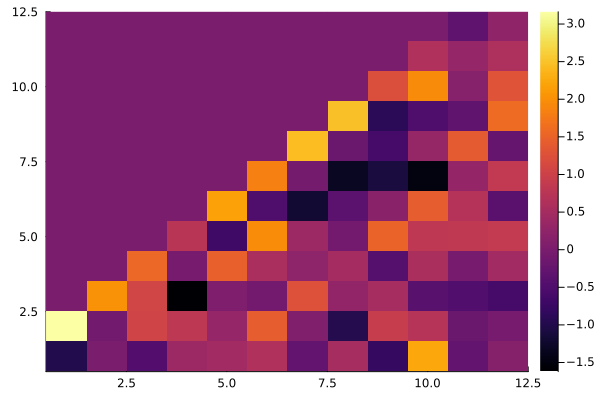

In [93]:
m = 12
A = rand((-1.0:1.0), m, m)
H = Hessenberg(A, m)
#display(A)
print("Eigenvalues Unchanged = ", .5 > abs(norm(eigen(A).values - eigen(H).values)))
display(H)
heatmap(H)

## Perform the decomposition in an upward direction instead of downward

In [106]:
function HessenbergUp(A, m)
    H = copy(A)
    Q = zeros(m, m)
    for i in m:-1:3
        u = H[i,:]
        u[i:m] *= 0.0; 
        u[i - 1] -= norm(u)
        u = normalize(u)
        Q = I - 2 * u * u'
        H = Q*H*Q'
    end 
    return H
end

HessenbergUp (generic function with 1 method)

4×4 Matrix{Float64}:
 0.124139  0.768107  0.345982  0.81919
 0.854978  0.746567  0.708852  0.291307
 0.554422  0.498232  0.636604  0.61104
 0.132588  0.024037  0.362152  0.229712

Eigenvalues Unchanged = true

4×4 Matrix{Float64}:
 -0.384745      0.0912567   -0.282754  0.4157
  0.0874379     0.920783     0.908772  0.443058
  4.58009e-17   0.784715     0.971272  0.871891
 -5.40858e-17  -4.1459e-17   0.386408  0.229712

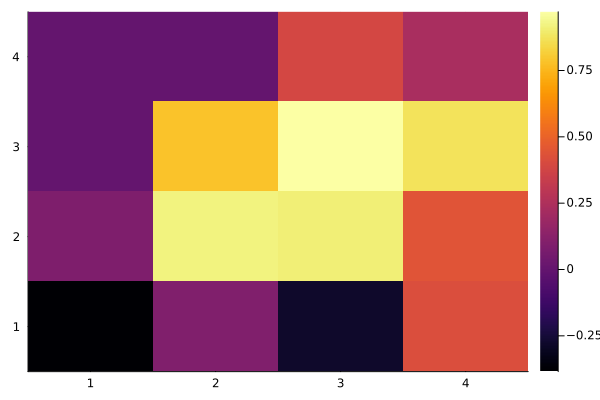

In [108]:
m = 4
A = rand(m, m)
H = HessenbergUp(A, m)
display(A)
print("Eigenvalues Unchanged = ", .5 > abs(norm(eigen(A).values - eigen(H).values)))

display(H)
heatmap(H)